<a href="https://colab.research.google.com/github/parakram93/project_-44-46-81-/blob/main/(44%2C46%2C81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Data Cleaning
print("Missing values in each column:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\nUnique values in 'owner':")
print(df['owner'].unique())

df = df[df['owner'].isin(['1st owner', '2nd owner', '3rd owner', '4th owner'])]

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
df.dropna(subset=['year', 'selling_price', 'km_driven'], inplace=True)

# Recode Year into bins
bins = [2000, 2005, 2010, 2015, 2020, 2025]
labels = ['2000-2005', '2005-2010', '2010-2015', '2015-2020', '2020-2025']
df['Year Range'] = pd.cut(df['year'], bins=bins, labels=labels)

# Set plot style
sns.set_style("whitegrid")








Saving BIKE DETAILS.csv to BIKE DETAILS (4).csv
Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Number of duplicate rows:
4

Unique values in 'owner':
['1st owner' '2nd owner' '3rd owner' '4th owner']


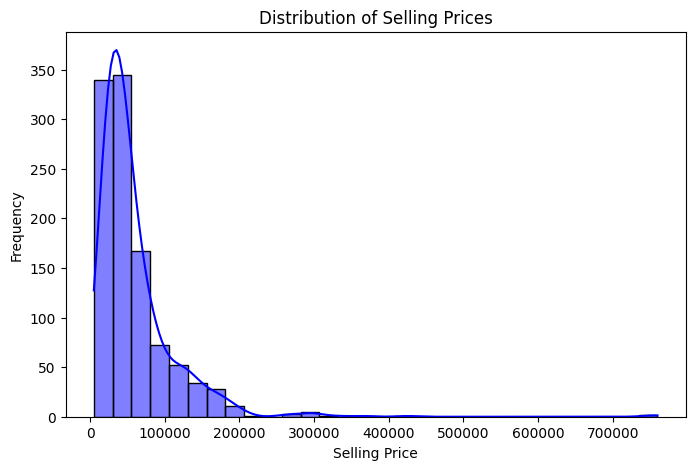

In [38]:
# 1. Selling Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-40-4d925e1eb7b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year Range', palette='viridis')


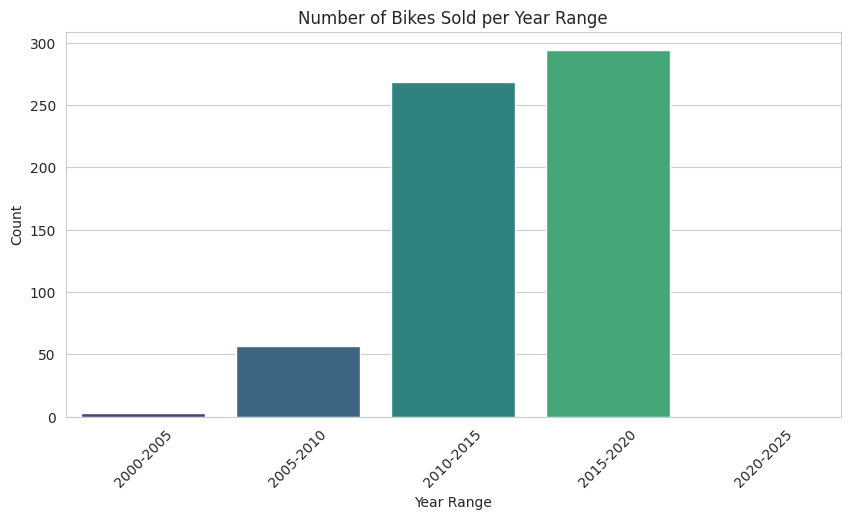

In [40]:
# 2. Year-wise Bike Sales Trend
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year Range', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Bikes Sold per Year Range')
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.show()

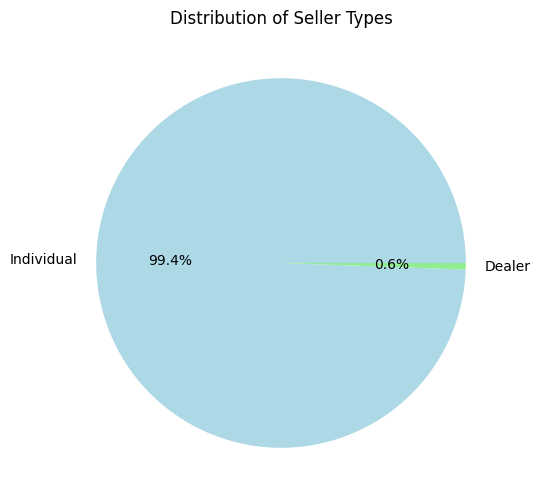

In [36]:
# 3. Seller Type Distribution
plt.figure(figsize=(6, 6))
df['seller_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange'])
plt.title('Distribution of Seller Types')
plt.ylabel('')
plt.show()

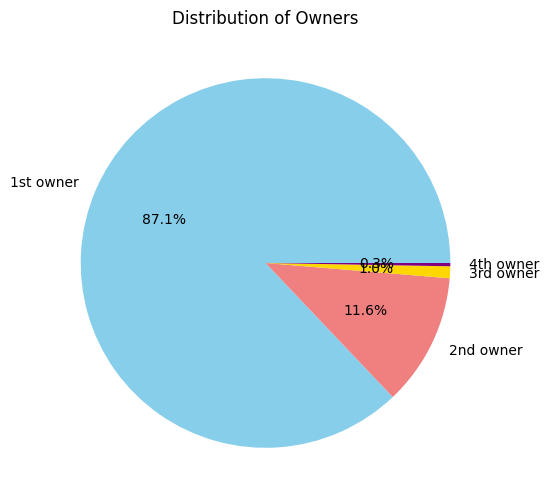

In [35]:
# 4. Owner Type Distribution
plt.figure(figsize=(6, 6))
df['owner'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold', 'purple'])
plt.title('Distribution of Owners')
plt.ylabel('')
plt.show()

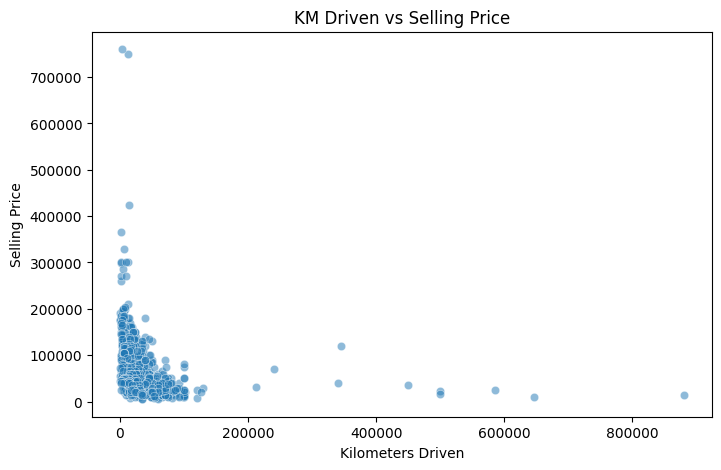

In [34]:
# 5. Scatter Plot: KM Driven vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='km_driven', y='selling_price', alpha=0.5)
plt.title('KM Driven vs Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

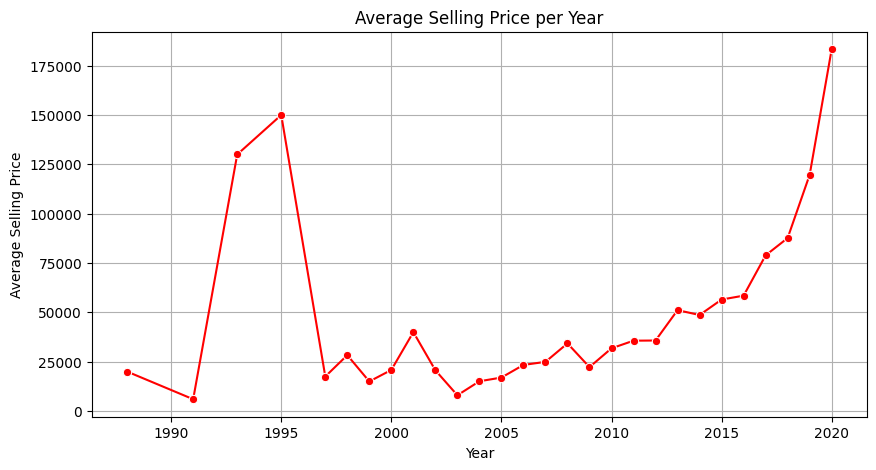

In [33]:
# 6. Line Chart: Average Selling Price per Year
plt.figure(figsize=(10, 5))
avg_price_per_year = df.groupby('year')['selling_price'].mean()
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values, marker='o', color='red')
plt.title('Average Selling Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

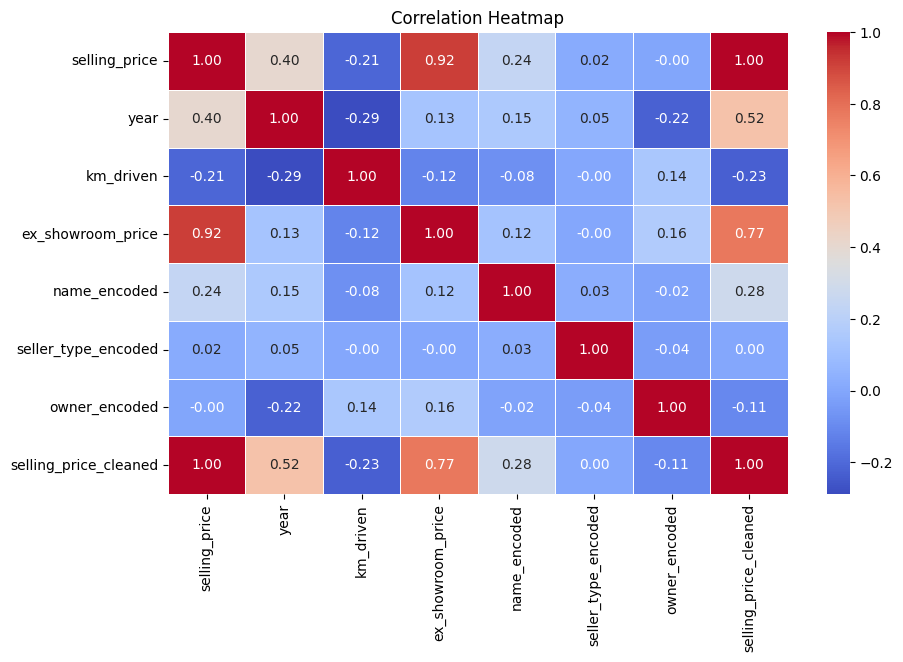

In [32]:
# 7. Heatmap - Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
# measure of central tendency
#  Mean
def manual_mean(data):
    return sum(data) / len(data)

# Median
def manual_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    return (sorted_data[n//2] if n % 2 != 0 else (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2)

#  Mode
def manual_mode(data):
    freq = {}
    for value in data:
        freq[value] = freq.get(value, 0) + 1
    return max(freq, key=freq.get)

# Define numerical_cols
# This line gets the list of numerical columns from your DataFrame.
numerical_cols = df.select_dtypes(include=['number']).columns

# Compute for numerical columns
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"Mean: {manual_mean(df[col])}")
    print(f"Median: {manual_median(df[col])}")
    print(f"Mode: {manual_mode(df[col])}")


selling_price:
Mean: 59565.39067524116
Median: 45000.0
Mode: 50000

year:
Mean: 2014.8167202572347
Median: 2015.0
Mode: 2016

km_driven:
Mean: 32482.969453376205
Median: 25000.0
Mode: 25000

ex_showroom_price:
Mean: 88060.79421221865
Median: 72752.5
Mode: 50267.0


In [44]:
# Variance and Standard Deviation

#  Variance
def manual_variance(data):
    mean = manual_mean(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

#  Standard Deviation
def manual_std_dev(data):
    return manual_variance(data) ** 0.5

# ✅ Re-define numerical_cols to include only true numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Compute for numerical columns
for col in numerical_cols:
    print(f"\n{col}: Variance: {manual_variance(df[col])}, Standard Deviation: {manual_std_dev(df[col])}")


selling_price: Variance: 3600865365.4084706, Standard Deviation: 60007.210945089515

year: Variance: 9.05322525614915, Standard Deviation: 3.008857799256912

km_driven: Variance: 2068438871.8591976, Standard Deviation: 45480.09313819836

ex_showroom_price: Variance: 6031507211.404601, Standard Deviation: 77662.77880300576



Shape of dataset after outlier removal: (622, 9)


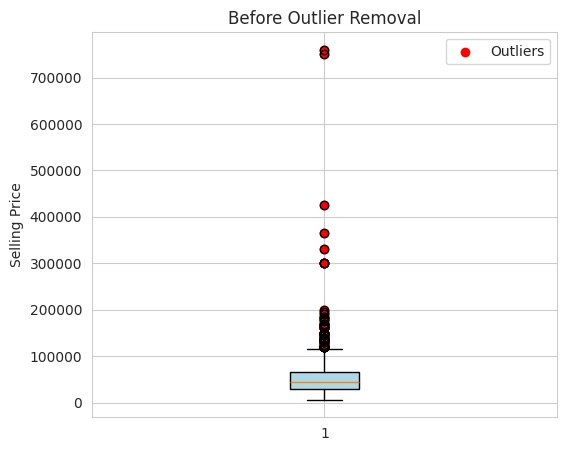

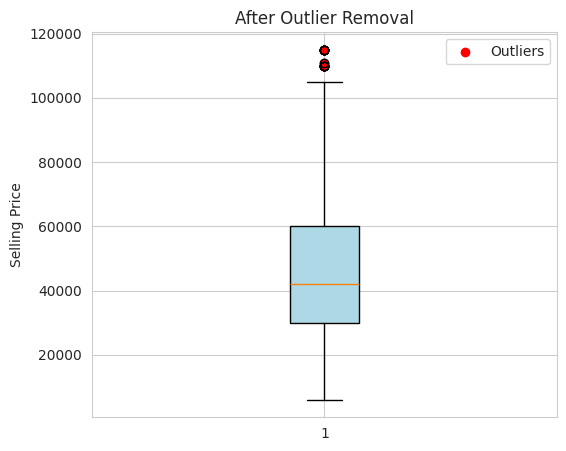

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to remove outliers and replace them with NaN
def remove_outliers(data):
    sorted_data = sorted(data)
    Q1 = sorted_data[len(sorted_data)//4]
    Q3 = sorted_data[(len(sorted_data)*3)//4]
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [x for x in data if not (lower_bound <= x <= upper_bound)]

    # Replace outliers with NaN
    return data.apply(lambda x: float('nan') if x in outliers else x)

# Apply outlier removal
df['selling_price_cleaned'] = remove_outliers(df['selling_price'])

print("\nShape of dataset after outlier removal:", df.shape)  # Maintain shape consistency
def manual_boxplot(data, title):
    sorted_data = sorted(data.dropna())  # Drop NaN values for visualization
    n = len(sorted_data)

    # Compute Q1, Q2 (median), Q3
    Q1 = sorted_data[n//4]
    Q2 = sorted_data[n//2]  # Median
    Q3 = sorted_data[(n*3)//4]
    IQR = Q3 - Q1

    # Define whiskers
    lower_whisker = max(min(sorted_data), Q1 - 1.5 * IQR)
    upper_whisker = min(max(sorted_data), Q3 + 1.5 * IQR)

    # Identify outliers
    outliers = [x for x in sorted_data if x < lower_whisker or x > upper_whisker]

    # Plot boxplot manually
    plt.figure(figsize=(6, 5))
    plt.boxplot(sorted_data, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.scatter([1] * len(outliers), outliers, color='red', marker='o', label="Outliers")
    plt.title(title)
    plt.ylabel("Selling Price")
    plt.legend()
    plt.show()

# Plot before and after
manual_boxplot(df['selling_price'], "Before Outlier Removal")
manual_boxplot(df['selling_price_cleaned'], "After Outlier Removal")


In [11]:
# Count total records
total_records = len(df)

# P(A) - Probability of a car being a 1st owner
p_owner = sum(df['owner'] == '1st owner') / total_records

# P(B) - Probability of a car being sold by an Individual seller
p_seller = sum(df['seller_type'] == 'Individual') / total_records

# P(B|A) - Probability of an Individual seller given that the car is a 1st owner
p_seller_given_owner = sum((df['owner'] == '1st owner') & (df['seller_type'] == 'Individual')) / sum(df['owner'] == '1st owner')

# Bayes' Theorem Calculation
bayes_prob = (p_seller_given_owner * p_owner) / p_seller

# Print result
print("\nBayesian Probability (Detailed Calculation):", bayes_prob)



Bayesian Probability (Detailed Calculation): 0.8720379146919433


In [8]:
# hypothesis testing
from math import sqrt
import scipy.stats as stats

#  Mean Calculation
def manual_mean(data):
    return sum(data) / len(data)

#  Variance Calculation (Unbiased Variance)
def manual_variance(data):
    mean = manual_mean(data)
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)

#  t-test Calculation
def manual_t_test(group1, group2):
    mean1, mean2 = manual_mean(group1), manual_mean(group2)
    var1, var2 = manual_variance(group1), manual_variance(group2)
    n1, n2 = len(group1), len(group2)

    # Compute t-statistic
    t_stat = (mean1 - mean2) / sqrt((var1/n1) + (var2/n2))

    # Degrees of freedom (Welch’s t-test approximation)
    df = ((var1/n1 + var2/n2) ** 2) / (((var1/n1) ** 2) / (n1 - 1) + ((var2/n2) ** 2) / (n2 - 1))

    # Get the critical t-value for 95% confidence level (alpha = 0.05, two-tailed test)
    t_critical = stats.t.ppf(1 - 0.025, df)  # 0.025 for two-tailed test (95% confidence)

    # Calculate p-value
    p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2  # Multiply by 2 for two-tailed test

    return t_stat, df, t_critical, p_value

# Get data for 1st and 2nd owners
group1 = df[df['owner'] == '1st owner']['selling_price']
group2 = df[df['owner'] == '2nd owner']['selling_price']

# Run t-test
t_stat, df, t_critical, p_value = manual_t_test(group1, group2)

# Print results
print("\nT-statistic:", t_stat)
print("Degrees of Freedom:", df)
print("Critical t-value (95% confidence):", t_critical)
print("p-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("🔴 Reject the null hypothesis (Significant difference in selling prices)")
else:
    print("🟢 Fail to reject the null hypothesis (No significant difference in selling prices)")



T-statistic: 0.5764548827400376
Degrees of Freedom: 135.22896680401072
Critical t-value (95% confidence): 1.9776619947445424
p-value: 0.5652660137509042
🟢 Fail to reject the null hypothesis (No significant difference in selling prices)


In [28]:
#label encoding
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Function to encode categorical features
def manual_label_encoding(column):
    unique_values = sorted(set(column))  # Extract and sort unique values
    mapping = {val: idx for idx, val in enumerate(unique_values)}  # Create mapping dictionary
    encoded_column = [mapping[val] for val in column]  # Convert values using mapping
    return encoded_column, mapping  # Return encoded column and mapping

# Identify categorical columns (excluding numerical ones)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply encoding to each categorical column
encoding_mappings = {}  # Store mappings for reference

for col in categorical_columns:
    df[col + '_encoded'], mapping = manual_label_encoding(df[col])
    encoding_mappings[col] = mapping  # Store mapping dictionary

# Function to format output like Pandas default display
def display_format(df_encoded, original_col):
    encoded_col = original_col + '_encoded'
    first_five = df_encoded[[original_col, encoded_col]].head().to_string(index=True)  # First 5 rows
    last_five = df_encoded[[original_col, encoded_col]].tail().to_string(index=True)  # Last 5 rows
    return f"{first_five}\n...\n{last_five}"  # Mimics Pandas-style truncation

# Display encoded data for reference
for col in categorical_columns:
    print(f"\n Encoded '{col}':")
    print(display_format(df, col))

# Display mappings for reference
print("\nEncoding Mappings for Each Categorical Feature:")
for col, mapping in encoding_mappings.items():
    print(f"{col}: {mapping}")


Saving BIKE DETAILS.csv to BIKE DETAILS (3).csv

 Encoded 'name':
                                  name  name_encoded
0            Royal Enfield Classic 350           179
1                            Honda Dio           145
2  Royal Enfield Classic Gunmetal Grey           183
3    Yamaha Fazer FI V 2.0 [2016-2018]           260
4                Yamaha SZ [2013-2014]           269
...
                    name  name_encoded
1056           Activa 3g             0
1057    Honda CB twister           140
1058  Bajaj Discover 125            21
1059      Honda CB Shine           132
1060    Bajaj Pulsar 150            35

 Encoded 'seller_type':
  seller_type  seller_type_encoded
0  Individual                    1
1  Individual                    1
2  Individual                    1
3  Individual                    1
4  Individual                    1
...
     seller_type  seller_type_encoded
1056  Individual                    1
1057  Individual                    1
1058  Individual         


Eigenvalues:
 [2.50262386e+00 1.64494052e+00 7.99406028e-01 5.30295935e-02
 8.43618304e-17]

Explained Variance Ratio:
 [5.00524772e-01 3.28988103e-01 1.59881206e-01 1.06059187e-02
 1.68723661e-17]

Cumulative Variance:
 [0.50052477 0.82951288 0.98939408 1.         1.        ]

Number of Principal Components for 95% variance: 3


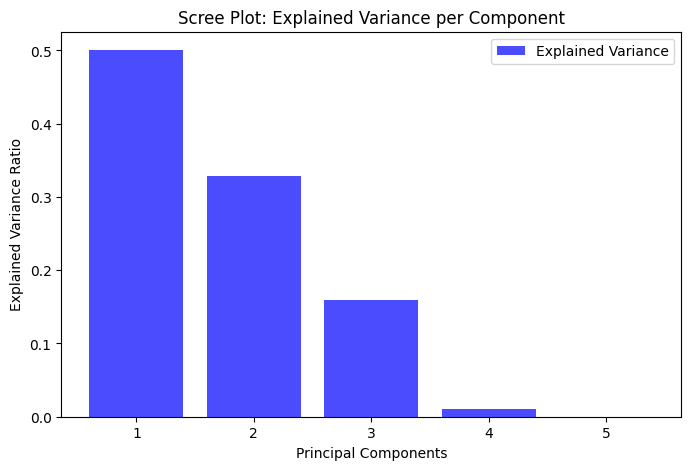

In [27]:
# PCA(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['number']).columns



# Standardize/Scale numerical features manually
df_scaled = df[numerical_cols].copy()
for col in numerical_cols:
    df_scaled[col] = (df_scaled[col] - df_scaled[col].mean()) / df_scaled[col].std()

# Computing
# PCA (2)
import numpy as np

 #Standardize Data (Manually)
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numerical columns
df_numeric = df[numeric_cols].dropna()  # Drop NaNs for calculations

mean_vec = np.mean(df_numeric, axis=0)
std_vec = np.std(df_numeric, axis=0)
df_scaled = (df_numeric - mean_vec) / std_vec  # Standardized data

# Compute Covariance Matrix (Manually)
cov_matrix = np.dot(df_scaled.T, df_scaled) / len(df_scaled)

#  Compute Eigenvalues & Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# S Compute Explained Variance Ratio (Manually)
explained_variance_ratio = eig_vals / sum(eig_vals)

#  Compute Cumulative Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

#  Select `n` Components that Explain 95% Variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print("\nEigenvalues:\n", eig_vals)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)
print("\nCumulative Variance:\n", cumulative_variance)
print("\nNumber of Principal Components for 95% variance:", n_components)

# plot explained variance
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue', label="Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot: Explained Variance per Component")
plt.legend()
plt.show()

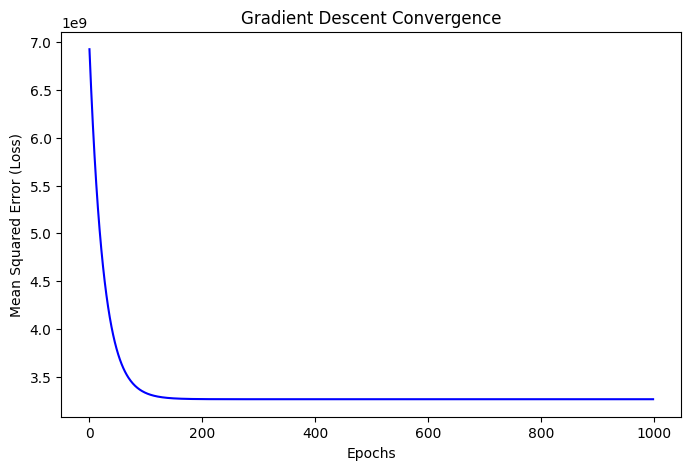

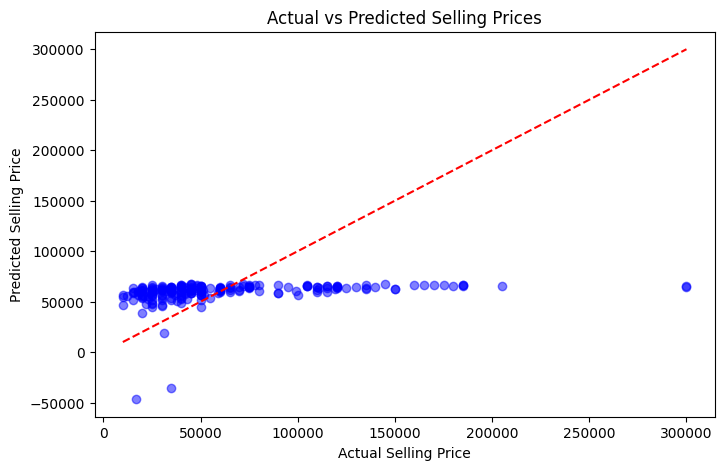


Final Linear Regression Weights (w, b): -11754.258860851782 59429.50223246034


In [26]:
# linear regression
import numpy as np
import matplotlib.pyplot as plt

# Clean and convert numeric columns
df['km_driven'] = df['km_driven'].astype(float)
df['selling_price'] = df['selling_price'].astype(float)

# Feature Scaling (Standardization)
km_mean, km_std = np.mean(df['km_driven']), np.std(df['km_driven'])
df['km_driven_scaled'] = (df['km_driven'] - km_mean) / km_std

# Train-Test Split (80-20 split manually)
split = int(0.8 * len(df))
X_train, X_test = df['km_driven_scaled'][:split].values, df['km_driven_scaled'][split:].values
y_train, y_test = df['selling_price'][:split].values, df['selling_price'][split:].values

# Initialize weights & bias
w, b = 0, 0
learning_rate = 0.01
epochs = 1000
loss_history = []  # Store loss values

#  Gradient Descent for Linear Regression
for _ in range(epochs):
    y_pred = w * X_train + b
    error = y_train - y_pred
    mse = np.mean(error**2)  # Mean Squared Error (MSE)
    loss_history.append(mse)  # Store loss

    dw = -2 * sum(X_train * error) / len(y_train)
    db = -2 * sum(error) / len(y_train)
    w -= learning_rate * dw
    b -= learning_rate * db

# Predictions on Test Data
y_pred_test = w * X_test + b

# Plot Gradient Descent Convergence (Loss vs Epochs)
plt.figure(figsize=(8,5))
plt.plot(range(epochs), loss_history, color='blue', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Gradient Descent Convergence")
plt.show()

# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Prices")
plt.show()

print("\nFinal Linear Regression Weights (w, b):", w, b)


In [25]:
# feeature scalling
import numpy as np
import pandas as pd

# Select numeric columns (modify as needed)
numeric_cols = ['year', 'selling_price', 'km_driven']

# Standard Scaling (Z-score normalization)
def manual_standard_scaling(column):
    mean_val = sum(column) / len(column)
    std_val = (sum((x - mean_val) ** 2 for x in column) / len(column)) ** 0.5
    return [(x - mean_val) / std_val for x in column]

# Min-Max Scaling (0 to 1)
def manual_minmax_scaling(column):
    col_min, col_max = min(column), max(column)
    return [(x - col_min) / (col_max - col_min) for x in column]

# Apply scaling
df_standard_scaled = pd.DataFrame({col: manual_standard_scaling(df[col]) for col in numeric_cols})
df_minmax_scaled = pd.DataFrame({col: manual_minmax_scaling(df[col]) for col in numeric_cols})

# Format output like Pandas default display
def display_format(df_scaled):
    first_five = df_scaled.head().to_string(index=True)  # First 5 rows
    last_five = df_scaled.tail().to_string(index=True)   # Last 5 rows
    return f"{first_five}\n...\n{last_five}"  # Mimics Pandas-style truncation

# Print formatted output
print("Standard Scaled Data:\n", display_format(df_standard_scaled), "\n")
print("MinMax Scaled Data:\n", display_format(df_minmax_scaled))


Standard Scaled Data:
        year  selling_price  km_driven
0  1.193928       2.049866  -0.659120
1  0.728722      -0.260105  -0.556405
2  0.961325       1.605641  -0.433340
3  0.263515       0.095275  -0.220157
4 -0.666899      -0.704331  -0.258917
...
          year  selling_price  km_driven
1056 -0.899502      -0.757638   9.024241
1057 -0.434295      -0.775407  -0.026354
1058 -0.201692      -0.793176   0.012407
1059 -1.132105      -0.846483   0.361252
1060 -1.364709      -0.882021   1.121599 

MinMax Scaled Data:
       year  selling_price  km_driven
0  0.96875       0.225166   0.000000
1  0.90625       0.052980   0.006025
2  0.93750       0.192053   0.013244
3  0.84375       0.079470   0.025749
4  0.71875       0.019868   0.023475
...
         year  selling_price  km_driven
1056  0.68750       0.015894   0.568010
1057  0.75000       0.014570   0.037117
1058  0.78125       0.013245   0.039391
1059  0.65625       0.009272   0.059853
1060  0.62500       0.006623   0.104454


In [24]:
# handling text and categorical values
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Function to  perform one-hot encoding
def manual_one_hot_encoding(column):
    unique_values = sorted(set(column))  # Extract and sort unique values
    encoding_dict = {val: [1 if val == unique else 0 for unique in unique_values] for val in unique_values}
    encoded_data = [encoding_dict[val] for val in column]  # Encode each value
    return encoded_data, unique_values  # Return encoded data and unique category names

# Apply  one-hot encoding to 'seller_type'
df['seller_type_encoded'], seller_types = manual_one_hot_encoding(df['seller_type'])

# Function to format and display output
def display_one_hot(df, col, categories):
    first_five = df[[col, col + '_encoded']].head().to_string(index=True)  # First 5 rows
    last_five = df[[col, col + '_encoded']].tail().to_string(index=True)  # Last 5 rows
    return f"{first_five}\n...\n{last_five}"  # Mimics Pandas-style truncation

# Display encoded seller type
print("\nManually Encoded 'seller_type':")
print(display_one_hot(df, 'seller_type', seller_types))

# Display encoding mapping for reference
print("\nOne-Hot Encoding Mapping:")
for seller in seller_types:
    print(f"{seller}: {seller_types.index(seller)}")



Manually Encoded 'seller_type':
  seller_type seller_type_encoded
0  Individual              [0, 1]
1  Individual              [0, 1]
2  Individual              [0, 1]
3  Individual              [0, 1]
4  Individual              [0, 1]
...
     seller_type seller_type_encoded
1056  Individual              [0, 1]
1057  Individual              [0, 1]
1058  Individual              [0, 1]
1059  Individual              [0, 1]
1060  Individual              [0, 1]

One-Hot Encoding Mapping:
Dealer: 0
Individual: 1



Logistic Regression Predictions (Manual): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Sigmoid(0): 0.5
Sigmoid(5): 0.9933071490757153
Sigmoid(-5): 0.0066928509242848554


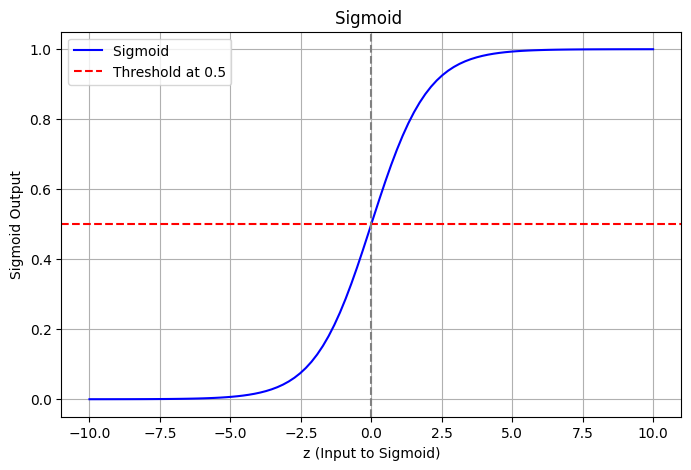

In [23]:
#logistic regression
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Select feature (ensure it's numeric)
X = df['km_driven'].values  # Extract 'km_driven' as a feature
X = X.reshape(-1, 1)  # Reshape to ensure correct matrix dimensions

# Initialize weights and bias manually
weights = np.zeros((X.shape[1], 1))  # One weight per feature
bias = 0  # Bias term

# ✅ * Sigmoid Function**
def manual_sigmoid(z):
    """ Compute the sigmoid activation  """
    return 1 / (1 + np.exp(-z))

# Compute the linear combination (z = X * w + b)
z = np.dot(X, weights) + bias

# Apply  sigmoid function to get probabilities
test_preds = manual_sigmoid(z).flatten()  # Convert to 1D array

# Convert probabilities to binary predictions (threshold at 0.5)
predictions = [1 if p > 0.5 else 0 for p in test_preds]

# Display first 10 predictions
print("\nLogistic Regression Predictions (Manual):", predictions[:10])

# ✅ **Testing Sigmoid Function**
print("\nSigmoid(0):", manual_sigmoid(0))  # Expected output: 0.5
print("Sigmoid(5):", manual_sigmoid(5))  # Expected output: Close to 1
print("Sigmoid(-5):", manual_sigmoid(-5))  # Expected output: Close to 0

# ✅ **Define z_values and sigmoid_values for plotting**
z_values = np.linspace(-10, 10, 100)  # Create a range of input values for the sigmoid
sigmoid_values = manual_sigmoid(z_values)  # Calculate corresponding sigmoid outputs

# ✅ **Now you can plot**
plt.figure(figsize=(8, 5))
plt.plot(z_values, sigmoid_values, color='blue', label="Sigmoid ")
plt.axhline(y=0.5, color='red', linestyle="--", label="Threshold at 0.5")  # Decision boundary
plt.axvline(x=0, color='gray', linestyle="--")  # Highlight zero
plt.title("Sigmoid ")
plt.xlabel("z (Input to Sigmoid)")
plt.ylabel("Sigmoid Output")
plt.legend()
plt.grid()
plt.show()

<ipython-input-22-ef0de19b5e7a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-22-ef0de19b5e7a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

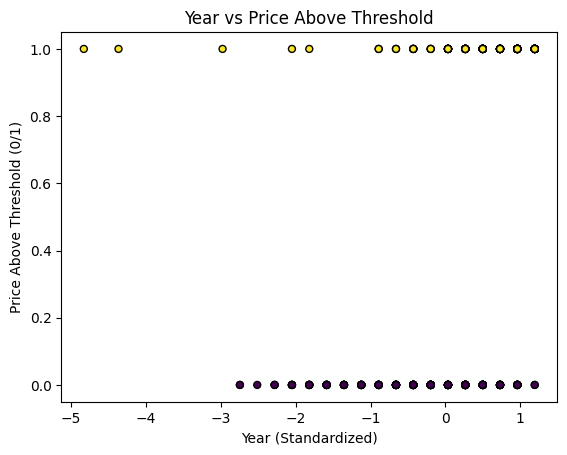

Accuracy: 0.7179


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# 🔹 Handle missing values by filling with median
df['year'].fillna(df['year'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

# 🔹 Convert to numeric types
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

# 🔹 Create a binary target variable (e.g., selling_price above a threshold)
threshold = df['selling_price'].median()
df['price_above_threshold'] = (df['selling_price'] > threshold).astype(int)

# 🔹 Feature selection: Using 'year' to predict 'price_above_threshold'
X = df[['year']].values
y = df['price_above_threshold'].values

# 🔹 Train-test split ( implementation)
split_ratio = 0.7
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 🔹 Feature Scaling ( Standardization)
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

# 🔹 Add intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# 🔹 Initialize parameters
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 1000

# 🔹 Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 🔹 Logistic Regression: Gradient Descent
for _ in range(epochs):
    z = np.dot(X_train, weights)
    predictions = sigmoid(z)
    gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)
    weights -= learning_rate * gradient

# 🔹 Predict on test data
y_pred_probs = sigmoid(np.dot(X_test, weights))
y_pred = [1 if p > 0.5 else 0 for p in y_pred_probs]

# 🔹 Compute Accuracy
accuracy = sum(y_pred == y_test) / len(y_test)

# 🔹 Plot Data
plt.scatter(X_test[:, 1], y_test, marker='o', c=y_test, s=25, edgecolor='k')
plt.title("Year vs Price Above Threshold")
plt.xlabel("Year (Standardized)")
plt.ylabel("Price Above Threshold (0/1)")
plt.show()

# 🔹 Print Accuracy
print(f"Accuracy: {accuracy:.4f}")


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# 🔹 Handle missing values by filling with median
df['year'].fillna(df['year'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

# 🔹 Convert to numeric types
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

# 🔹 Create a binary target variable (e.g., selling_price above a threshold)
threshold = df['selling_price'].median()
df['price_above_threshold'] = (df['selling_price'] > threshold).astype(int)

# 🔹 Feature selection: Using 'year' to predict 'price_above_threshold'
X = df[['year']].values
y = df['price_above_threshold'].values

# 🔹 Train-test split
split_ratio = 0.7
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 🔹 Feature Scaling
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

# 🔹 Add intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# 🔹 Initialize parameters
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 5000
batch_size = int(0.1 * X_train.shape[0])  # 10% of the dataset

# 🔹 Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 🔹 Function to compute the gradient
def compute_gradient(X_batch, y_batch, w):
    m = len(y_batch)
    predictions = sigmoid(np.dot(X_batch, w))
    error = predictions - y_batch
    loss = -np.sum(y_batch * np.log(predictions) + (1 - y_batch) * np.log(1 - predictions)) / m
    gradient = np.dot(X_batch.T, error) / m
    return loss, gradient

# 🔹 Mini-Batch Gradient Descent
for i in range(epochs):
    idx = np.random.randint(0, X_train.shape[0] - batch_size)  # Random index for batch selection
    X_batch = X_train[idx:idx + batch_size]
    y_batch = y_train[idx:idx + batch_size]
    loss, gradient = compute_gradient(X_batch, y_batch, weights)
    weights -= learning_rate * gradient  # Update weights
    if i % 1000 == 0:  # Print loss every 1000 iterations
        print(f"Iteration {i}, Loss: {loss:.4f}")

# 🔹 Predict on test data
y_pred_probs = sigmoid(np.dot(X_test, weights))
y_pred = [1 if p > 0.5 else 0 for p in y_pred_probs]

# 🔹 Compute Accuracy
accuracy = sum(y_pred == y_test) / len(y_test)

# 🔹 Print Final Weights
print(f"\nFinal weights after {epochs} iterations: {weights}")

# 🔹 Print Accuracy
print(f"Accuracy: {accuracy:.4f}")


<ipython-input-21-b25f58ab008b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-21-b25f58ab008b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Iteration 0, Loss: 0.6931
Iteration 1000, Loss: 0.5206
Iteration 2000, Loss: 0.4746
Iteration 3000, Loss: 0.6213
Iteration 4000, Loss: 0.6066

Final weights after 5000 iterations: [-0.40910929  1.79221734]
Accuracy: 0.7179



Correlation Matrix:
                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.576248
year                    0.402188  1.000000  -0.288675           0.052300
km_driven              -0.212937 -0.288675   1.000000          -0.063379
ex_showroom_price       0.576248  0.052300  -0.063379           0.589623


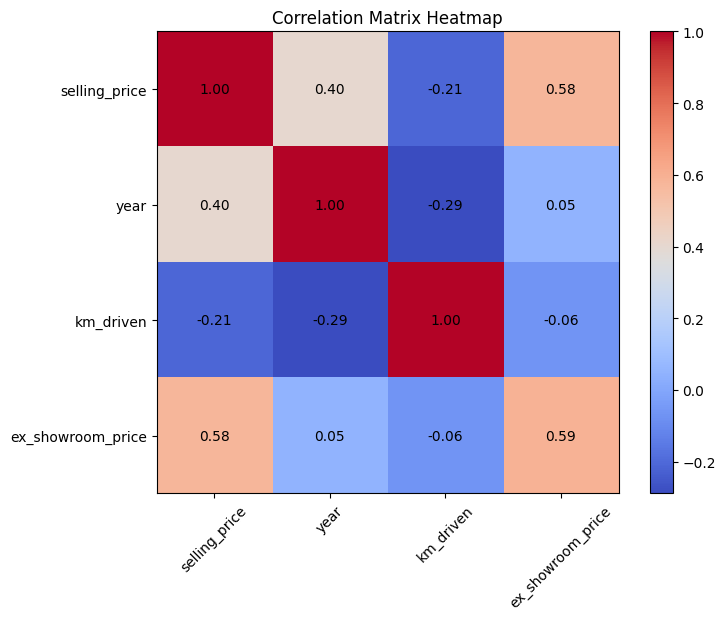

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# 🔹 Data Cleaning
# Convert numerical columns to proper numeric format (if they contain unwanted symbols)
df['selling_price'] = df['selling_price'].replace({',': ''}, regex=True).astype(float)
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['selling_price', 'km_driven'], inplace=True)

# 🔹 Manually Compute the Correlation Matrix
def manual_correlation_matrix(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
    correlation_matrix = np.zeros((len(numerical_cols), len(numerical_cols)))  # Empty matrix

    for i in range(len(numerical_cols)):  # Iterate through rows
        for j in range(len(numerical_cols)):  # Iterate through columns
            col1 = data[numerical_cols[i]]
            col2 = data[numerical_cols[j]]
            mean1, mean2 = np.mean(col1), np.mean(col2)
            std1, std2 = np.std(col1, ddof=1), np.std(col2, ddof=1)
            correlation_matrix[i, j] = np.sum((col1 - mean1) * (col2 - mean2)) / ((len(col1) - 1) * std1 * std2)

    return pd.DataFrame(correlation_matrix, index=numerical_cols, columns=numerical_cols)

# Compute the  correlation matrix
correlation_matrix = manual_correlation_matrix(df)

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 🔹  Create a Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Correlation Matrix Heatmap")

# Display the correlation values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()



🔹 Correlation Matrix:
                   Age_of_Bike  Depreciation_Rate  log_km_driven  \
Age_of_Bike           1.000000           0.756065       0.473013   
Depreciation_Rate     0.756065           1.000000       0.537295   
log_km_driven         0.473013           0.537295       1.000000   
price_per_km         -0.241426          -0.333191      -0.557108   
selling_price        -0.402188          -0.417784      -0.465866   
km_driven             0.288675           0.295084       0.615279   

                   price_per_km  selling_price  km_driven  
Age_of_Bike           -0.241426      -0.402188   0.288675  
Depreciation_Rate     -0.333191      -0.417784   0.295084  
log_km_driven         -0.557108      -0.465866   0.615279  
price_per_km           1.000000       0.534627  -0.149476  
selling_price          0.534627       1.000000  -0.212937  
km_driven             -0.149476      -0.212937   1.000000  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


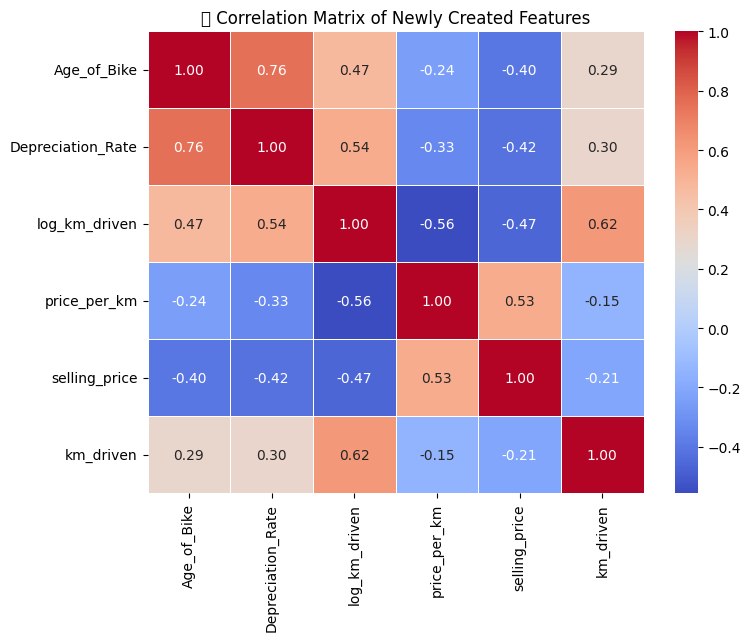

In [19]:
# feature construction
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset



# Convert necessary columns to numeric (handling errors)
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')




# --- 🔹 Step 2: Feature Construction ---

# Feature 1️⃣: **Age of Bike**
df['Age_of_Bike'] = 2025 - df['year']

# Feature 2️⃣: **Depreciation Rate**
df['Depreciation_Rate'] = (df['ex_showroom_price'] - df['selling_price']) / df['ex_showroom_price']

# Feature 3️⃣: **Log Transform of km_driven** (log1p avoids log(0) issue)
df['log_km_driven'] = np.log1p(df['km_driven'])

# Feature 4️⃣: **Price Per Kilometer Driven**
df['price_per_km'] = df['selling_price'] / (df['km_driven'] + 1)  # Avoid division by zero

# --- 🔹 Step 3: Correlation Analysis ---

# Selecting only numeric columns for correlation
numeric_features = ['Age_of_Bike', 'Depreciation_Rate', 'log_km_driven', 'price_per_km', 'selling_price', 'km_driven']
df_corr = df[numeric_features].corr()

# Display the correlation matrix
print("\n🔹 Correlation Matrix:")
print(df_corr)

# --- 🔹 Step 4: Correlation Heatmap Visualization ---
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("🔍 Correlation Matrix of Newly Created Features")
plt.show()